In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


def Euclidian_Distance(x,y):
    sum=0
    for i in range(len(x)):
        sum+= (x[i]-y[i])**2
    p= math.sqrt(sum)
    return p


def find_min(comp,val,cols):
    x=[]
    for i in comp:
        v= Euclidian_Distance(i,val)
        x.append(v)

    ind=x.index(min(x))
    return cols[ind]


def get_row(attr,i):
    x=[]
    for j in attr:
        x.append(df.at[i,j])
    return x

In [7]:
def k_means_algorithm(df):
    k= math.sqrt(len(df)/2)
    k= int(math.floor(k))

    num_cols= len(df.columns)
    keylist=[]
    for i in range(1,k+1):
        keylist.append("Group{}".format(i))

    x=[]
    for i in range(k):
        a=[]
        for j in df.columns:
            a.append(df.at[i,j])
        x.append(a)

    flag=0
    while flag==0:
        cluster={}
    
        for i in keylist:
            cluster[i]=[]
        
        j=0
        for i in keylist:
            cluster[i].append(x[j])
            j+=1
    
        for n in range(len(df)):
            x_pt=get_row(df.columns,n)

            comp=[]
            for i in cluster.keys():
                comp.append(cluster[i][0])
        
            col= find_min(comp,x_pt,list(cluster.keys()))
            cluster[col].append(x_pt)
        print("\n\nnext interation cluster\n\n",cluster)

        x_mean={}
        for i in keylist:
            x_mean[i]=None

        for col in cluster.keys():
            a= np.array(cluster[col])
            a= a.transpose()
            r,c=a.shape

            ls=[]
            for i in range(r):
                ls.append(a[i].mean())

            x_mean[col]=ls
        print(x_mean)

        flag=1
        for col in cluster.keys():
            a= Euclidian_Distance(x_mean[col], cluster[col][0])
        
            if(a>0.01):
                flag=0
                break

        x=[]
        for col in x_mean.keys():
            x.append(x_mean[col])

        if(flag==1):
            fig,ax= plt.subplots(1,2, figsize=(15,8))
            ax[0].scatter(df[df.columns[0]],df[df.columns[1]],c='black')
            ax[0].set_title("Before Clustering")
            rgb=['b','g','r','c','m','y','k','w']
            i=0
            for col in cluster.keys():
                i=(i+1)%len(rgb)
                a= np.array(cluster[col])
                a= a.transpose()
                ax[1].scatter(a[0],a[1],c=rgb[i])
            ax[1].set_title("After Clustering")
            return cluster
    



next interation cluster

 {'Group1': [[9, 9], [9, 9], [8, 8], [7, 6], [8, 7], [17, 16], [18, 15], [20, 20], [17, 16], [17, 16], [20, 18], [15, 19], [19, 15], [17, 16], [15, 15]], 'Group2': [[8, 0], [8, 0], [9, 3]], 'Group3': [[3, 8], [3, 8], [0, 7], [6, 8], [1, 2]]}
{'Group1': [14.4, 13.666666666666666], 'Group2': [8.333333333333334, 1.0], 'Group3': [2.6, 6.6]}


next interation cluster

 {'Group1': [[14.4, 13.666666666666666], [17, 16], [18, 15], [20, 20], [17, 16], [17, 16], [20, 18], [15, 19], [19, 15], [17, 16], [15, 15]], 'Group2': [[8.333333333333334, 1.0], [8, 0], [9, 3]], 'Group3': [[2.6, 6.6], [9, 9], [3, 8], [0, 7], [8, 8], [7, 6], [8, 7], [6, 8], [1, 2]]}
{'Group1': [17.21818181818182, 16.333333333333332], 'Group2': [8.444444444444445, 1.3333333333333333], 'Group3': [4.955555555555556, 6.844444444444445]}


next interation cluster

 {'Group1': [[17.21818181818182, 16.333333333333332], [17, 16], [18, 15], [20, 20], [17, 16], [17, 16], [20, 18], [15, 19], [19, 15], [17, 16],

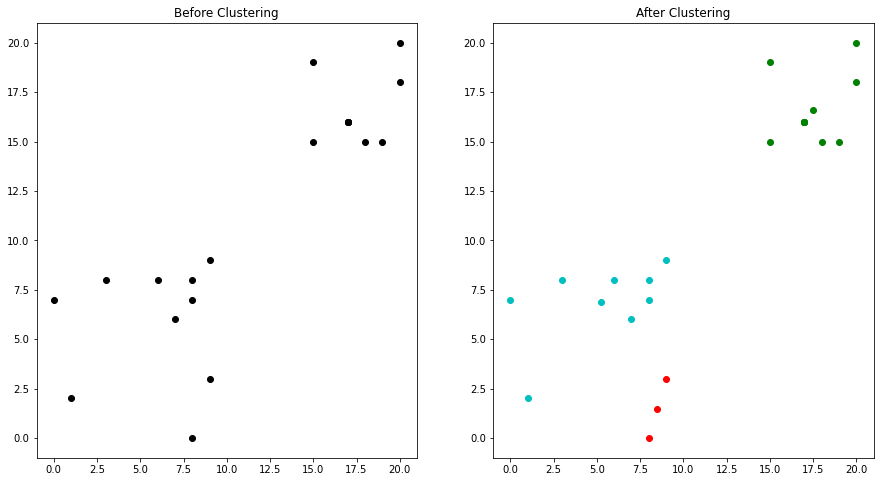

In [10]:
df= pd.read_csv("k_means_dataset.csv")
cluster= k_means_algorithm(df)
print("\n\n\n\n\n final cluster:\n\n",cluster)
plt.show()